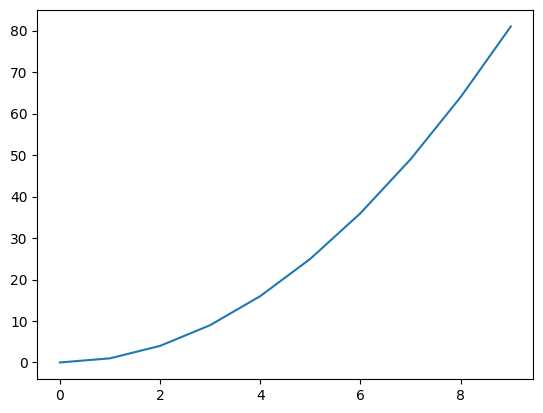

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

a=[x for x in range(10)]
b=np.square(a)
plt.plot(a,b)
plt.show()

In [221]:
def generate_stonk(max_x,inc_rate,noise):
    b = [1.0]*max_x
    for i in range(1, max_x):
        n = random.random()*noise-(noise/2.0)
        b[i]=b[i-1]*(1+inc_rate)+n
        
    if any([i<0 for i in b]):
        print("invalid stonk, re-trying")
        return generate_stonk(max_x,inc_rate,noise)
    else:
        return b

def simulate_donothing(a,b):
    return a[-1]+b[-1]

def simulate_50_50_renorm(a,b,window):
    curr_x=0
    bal=[1,1]
    max_x = len(a)
    assert(len(b)==max_x)
    while curr_x<max_x:
        if curr_x+window<max_x:
            x_inc = window
        else:
            x_inc = max_x-curr_x-1
        b_inc = b[curr_x+x_inc]/b[curr_x]
        a_inc = a[curr_x+x_inc]/a[curr_x]
        #print(b_inc)
        #print(c_inc)
        sum = bal[0]*a_inc+bal[1]*b_inc
        #print(sum)
        bal = [sum/2,sum/2]
        #print(bal)

        curr_x+=window

    return bal[0]+bal[1]

def simulate_max_perc_diff_renorm(a,b,maxdiff=0.2):
    curr_x=1
    bal=[1,1]
    max_x = len(a)
    total_renorms = 0
    assert(len(b)==max_x)
    while curr_x<max_x:
        bal = [bal[0]*a[curr_x]/a[curr_x-1],
               bal[1]*b[curr_x]/b[curr_x-1]]
        
        if abs(bal[0]-bal[1])/((bal[0]+bal[1])/2)>maxdiff:
            #print(f"renormalizing at x={curr_x} with values: {bal}")
            sum = bal[0]+bal[1]
            bal = [sum/2,sum/2]
            total_renorms+=1
    
        curr_x+=1
    
    
    print(f"total renorms: {total_renorms}")
    
    
    return bal[0]+bal[1]
    
    
    
    
    

invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying
invalid stonk, re-trying


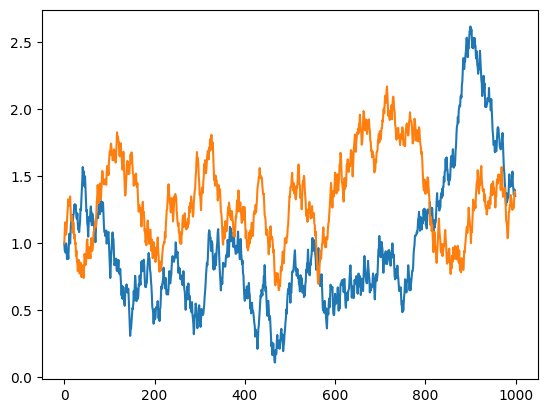

2.7224704985865973
scheduled
7.447277240967681
6.595375713937306
5.482132963552879
5.966028867197193
3.827674398534479
percentage
total renorms: 848
10.016995043531162
total renorms: 636
10.062247759331617
total renorms: 330
9.198967440222985
total renorms: 148
11.035259632006415
total renorms: 86
10.995866829216272
total renorms: 29
8.887138327895988


In [227]:
inc_rate = -0.002
noise = 0.2
max_x = 1000

x=[x for x in range(max_x)]
a = generate_stonk(max_x,inc_rate,noise)
b = generate_stonk(max_x,inc_rate,noise)

plt.plot(x,a)
plt.plot(x,b)
plt.show()

print(simulate_donothing(a,b))
print("scheduled")
print(simulate_50_50_renorm(a,b,5))
print(simulate_50_50_renorm(a,b,10))
print(simulate_50_50_renorm(a,b,20))
print(simulate_50_50_renorm(a,b,50))
print(simulate_50_50_renorm(a,b,100))
print("percentage")
print(simulate_max_perc_diff_renorm(a,b,0.02))
print(simulate_max_perc_diff_renorm(a,b,0.05))
print(simulate_max_perc_diff_renorm(a,b,0.10))
print(simulate_max_perc_diff_renorm(a,b,0.20))
print(simulate_max_perc_diff_renorm(a,b,0.30))
print(simulate_max_perc_diff_renorm(a,b,0.50))

In [179]:
print(simulate_donothing(a,b))
print(simulate_max_perc_diff_renorm(a,b))

300.14471792742813
renormalizing at x=4 with values: [1.0520213696141896, 0.8521055887924653]
renormalizing at x=29 with values: [1.1682996396351715, 0.9146018662310051]
renormalizing at x=49 with values: [1.1429432270633813, 1.5152648415108234]
renormalizing at x=79 with values: [1.5797778418355415, 1.939125515979267]
renormalizing at x=85 with values: [2.0484170073049266, 1.6429366676575365]
renormalizing at x=97 with values: [1.6323093230013797, 2.041325364748588]
renormalizing at x=124 with values: [1.6012147139622308, 2.0165481700880084]
renormalizing at x=131 with values: [1.7045287663505118, 2.1161825777390555]
renormalizing at x=143 with values: [2.149689892595217, 1.6461993174362615]
renormalizing at x=198 with values: [3.233873506416816, 2.6428169115774574]
320.85375941860957


In [85]:
window = 100
bal = [1,1]
curr_x = 0

#simulate 50:50 balancing

while curr_x<max_x:
    if curr_x+window<max_x:
        x_inc = window
    else:
        x_inc = max_x-curr_x-1
    a_inc = a[curr_x+x_inc]/a[curr_x]
    b_inc = b[curr_x+x_inc]/b[curr_x]
    #print(b_inc)
    #print(c_inc)
    sum = bal[0]*a_inc+bal[1]*b_inc
    #print(sum)
    bal = [sum/2,sum/2]
    #print(bal)
    
    curr_x+=window
    
print(bal[0]+bal[1])
    


220.51358083413754


In [73]:
curr_x

90